# Zero-Shot Text Classification
---
- politics
- diplomacy
- economy
- media
- society
- categorization

In [12]:
import pandas as pd
from transformers import pipeline
import torch
from datasets import Dataset
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [13]:
# Ensure GPU is used if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the zero-shot classification model
classifier = pipeline("zero-shot-classification", 
                      model="facebook/bart-large-mnli", 
                      device=device)

In [3]:
df = pd.read_csv('data.csv')
data = df.copy()
texts = data['post_content'].tolist()

In [4]:
# Function to classify text into 'politics' and store the score
def classify_texts_with_politics_score(texts):
    # Define the category to classify
    category = ["politics"]
    
    # Get classification results
    results = classifier(texts, category)
    
    # Extract scores for 'politics'
    scores = [result['scores'][0] for result in results]  # Score for the 'politics' category
    return scores

In [5]:
# Batch processing for large datasets with 'politics' score
def batch_process_with_politics_score(texts, batch_size=32):
    scores = []
    total_batches = len(texts) // batch_size + (1 if len(texts) % batch_size != 0 else 0)
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_scores = classify_texts_with_politics_score(batch_texts)  # Get scores for 'politics'
        scores.extend(batch_scores)
        print(f"Processed batch {i // batch_size + 1} of {total_batches}")
    return scores

In [6]:
# Perform classification with 'politics' score
print("Classifying texts...")
politics_scores = batch_process_with_politics_score(texts)

# Save the scores to the dataset
data['politics_score'] = politics_scores

# Save the results to a new CSV file
output_path = "scores.csv"
data.to_csv(output_path, index=False)
print(f"Classification completed. Results saved to {output_path}")

Classifying texts...
Processed batch 1 of 247
Processed batch 2 of 247
Processed batch 3 of 247
Processed batch 4 of 247
Processed batch 5 of 247
Processed batch 6 of 247
Processed batch 7 of 247
Processed batch 8 of 247
Processed batch 9 of 247
Processed batch 10 of 247
Processed batch 11 of 247
Processed batch 12 of 247
Processed batch 13 of 247
Processed batch 14 of 247
Processed batch 15 of 247
Processed batch 16 of 247
Processed batch 17 of 247
Processed batch 18 of 247
Processed batch 19 of 247
Processed batch 20 of 247
Processed batch 21 of 247
Processed batch 22 of 247
Processed batch 23 of 247
Processed batch 24 of 247
Processed batch 25 of 247
Processed batch 26 of 247
Processed batch 27 of 247
Processed batch 28 of 247
Processed batch 29 of 247
Processed batch 30 of 247
Processed batch 31 of 247
Processed batch 32 of 247
Processed batch 33 of 247
Processed batch 34 of 247
Processed batch 35 of 247
Processed batch 36 of 247
Processed batch 37 of 247
Processed batch 38 of 247


score가 0.5 이상인 값만 정치적인 데이터라고 판단

In [4]:
import pandas as pd

df = pd.read_csv('scores.csv')
df

,status_id,author_name,user_id,post_time,post_content,politics_score
0,7136,MSG_Jack_Dona_RET,@MSG_Jack_Dona_RET,2023-12-26 13:44:00,"All, please take 4 minutes to watch this video...",0.872614
1,7228,Donald J. Trump,@realDonaldTrump,2023-12-26 14:11:00,Wow—Thank you Charlie!,0.068434
2,7225,Donald J. Trump,@realDonaldTrump,2023-12-26 14:12:00,Thanks Derrick!,0.069813
3,7216,Donald J. Trump,@realDonaldTrump,2023-12-26 14:15:00,Garrett Ventry: “The Colorado Supreme Court ta...,0.986927
4,7214,Donald J. Trump,@realDonaldTrump,2023-12-26 14:16:00,“Trump’s MAGA force swamps the competition in ...,0.973380
...,...,...,...,...,...,...
7879,28795,Donald J. Trump,@realDonaldTrump,2024-12-25 14:43:00,"Merry Christmas to all, including to the wonde...",0.084254
7880,28796,Donald J. Trump,@realDonaldTrump,2024-12-25 14:43:00,…Page 2: Merry Christmas to the Radical Left L...,0.780920
7881,28797,Donald J. Trump,@realDonaldTrump,2024-12-25 14:55:00,"I just left Wayne Gretzky, “The Great One” as ...",0.955282
7882,28798,Donald J. Trump,@realDonaldTrump,2024-12-25 14:56:00,I am pleased to announce that Kevin Marino Cab...,0.927507


In [5]:
# politics_score 기준으로 politics와 non-politics 분류
df['category'] = df['politics_score'].apply(lambda x: 'politics' if x >= 0.5 else 'non-politics')

# 결과 출력
df

,status_id,author_name,user_id,post_time,post_content,politics_score,category
0,7136,MSG_Jack_Dona_RET,@MSG_Jack_Dona_RET,2023-12-26 13:44:00,"All, please take 4 minutes to watch this video...",0.872614,politics
1,7228,Donald J. Trump,@realDonaldTrump,2023-12-26 14:11:00,Wow—Thank you Charlie!,0.068434,non-politics
2,7225,Donald J. Trump,@realDonaldTrump,2023-12-26 14:12:00,Thanks Derrick!,0.069813,non-politics
3,7216,Donald J. Trump,@realDonaldTrump,2023-12-26 14:15:00,Garrett Ventry: “The Colorado Supreme Court ta...,0.986927,politics
4,7214,Donald J. Trump,@realDonaldTrump,2023-12-26 14:16:00,“Trump’s MAGA force swamps the competition in ...,0.973380,politics
...,...,...,...,...,...,...,...
7879,28795,Donald J. Trump,@realDonaldTrump,2024-12-25 14:43:00,"Merry Christmas to all, including to the wonde...",0.084254,non-politics
7880,28796,Donald J. Trump,@realDonaldTrump,2024-12-25 14:43:00,…Page 2: Merry Christmas to the Radical Left L...,0.780920,politics
7881,28797,Donald J. Trump,@realDonaldTrump,2024-12-25 14:55:00,"I just left Wayne Gretzky, “The Great One” as ...",0.955282,politics
7882,28798,Donald J. Trump,@realDonaldTrump,2024-12-25 14:56:00,I am pleased to announce that Kevin Marino Cab...,0.927507,politics


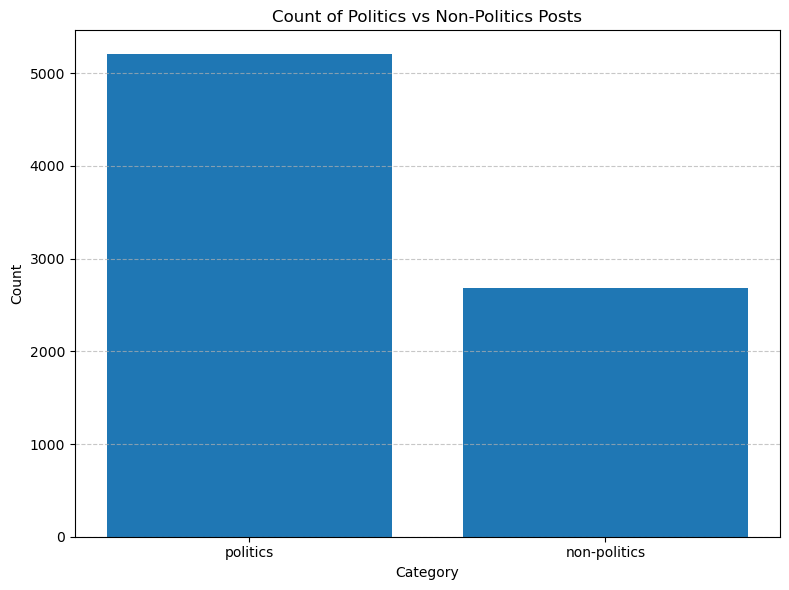

In [6]:
import matplotlib.pyplot as plt

# category별 개수 세기
category_counts = df['category'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('Count of Politics vs Non-Politics Posts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 보여주기
plt.show()